<a href="https://colab.research.google.com/github/challajaipalreddy/Amazon_Sales/blob/main/Amazon_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load The Dataset**

In [27]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/Amazon Sale Report.csv"
df = pd.read_csv(file_path)


df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


**Remove Unnecessary columns**

In [21]:

columns_to_drop = ["New", "PendingS"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors="ignore")


df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=False)

df["Amount"].fillna(0, inplace=True)
df.dropna(subset=["ship-city", "ship-state", "Date"], inplace=True)


print(df.dtypes)


index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object


<ipython-input-21-08e2772941ef>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=False)
<ipython-input-21-08e2772941ef>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Amount"].fillna(0, inplace=True)  # Replace NaN in Amount with 0


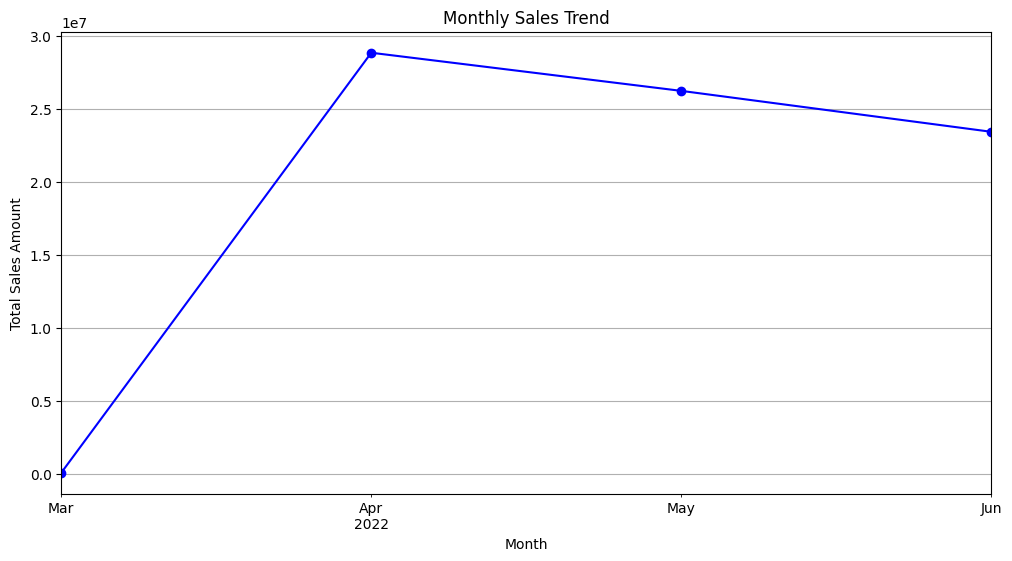

In [23]:
def sales_overview():
    """Analyze overall sales trends over time."""
    df_monthly = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()

    plt.figure(figsize=(12, 6))
    df_monthly.plot(marker='o', linestyle='-', color='b')
    plt.title("Monthly Sales Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Sales Amount")
    plt.grid()
    plt.show()

sales_overview()


**Sales Overview**

<ipython-input-24-5e23735491ee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


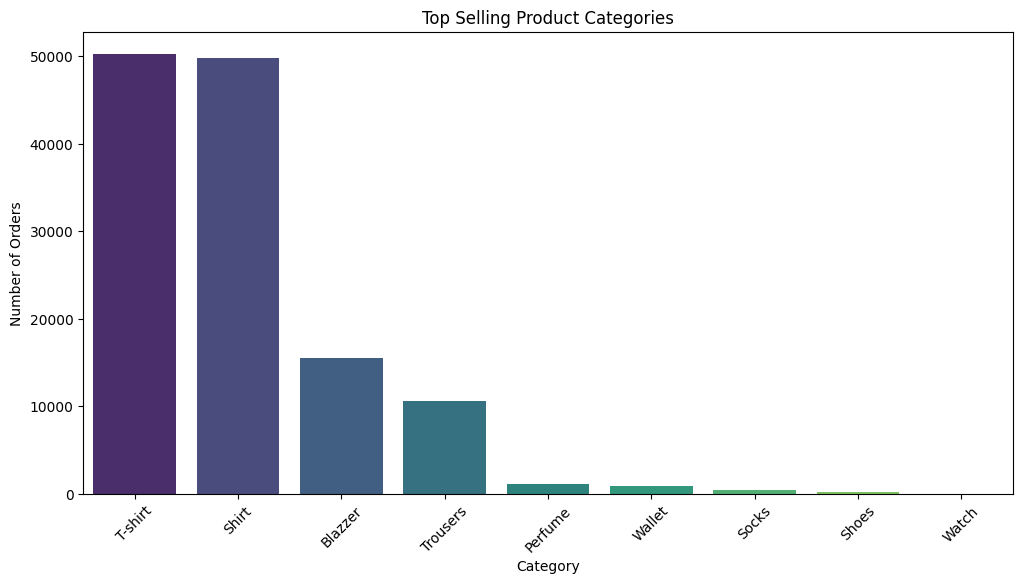

In [24]:
def product_analysis():
    """Analyze product category distribution."""
    if "Category" in df.columns:
        category_counts = df["Category"].value_counts()
        plt.figure(figsize=(12, 6))
        sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
        plt.xticks(rotation=45)
        plt.title("Top Selling Product Categories")
        plt.xlabel("Category")
        plt.ylabel("Number of Orders")
        plt.show()
    else:
        print("Category column not found!")

product_analysis()


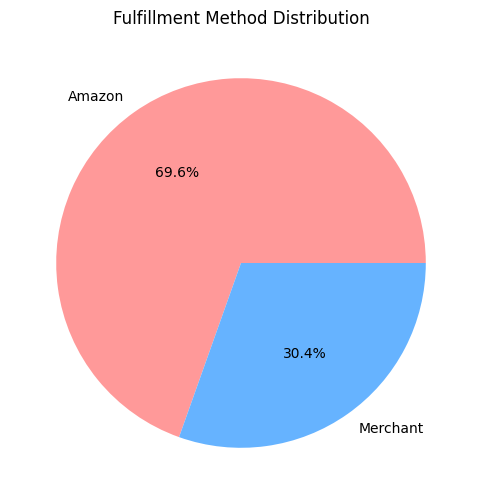

In [25]:
def fulfillment_analysis():
    """Analyze effectiveness of fulfillment methods."""
    if "Fulfilment" in df.columns:
        fulfillment_counts = df["Fulfilment"].value_counts()

        plt.figure(figsize=(6, 6))
        plt.pie(fulfillment_counts, labels=fulfillment_counts.index, autopct='%1.1f%%', colors=["#ff9999", "#66b3ff"])
        plt.title("Fulfillment Method Distribution")
        plt.show()
    else:
        print("Fulfilment column not found!")

fulfillment_analysis()


<ipython-input-29-32650012fabb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette="coolwarm")


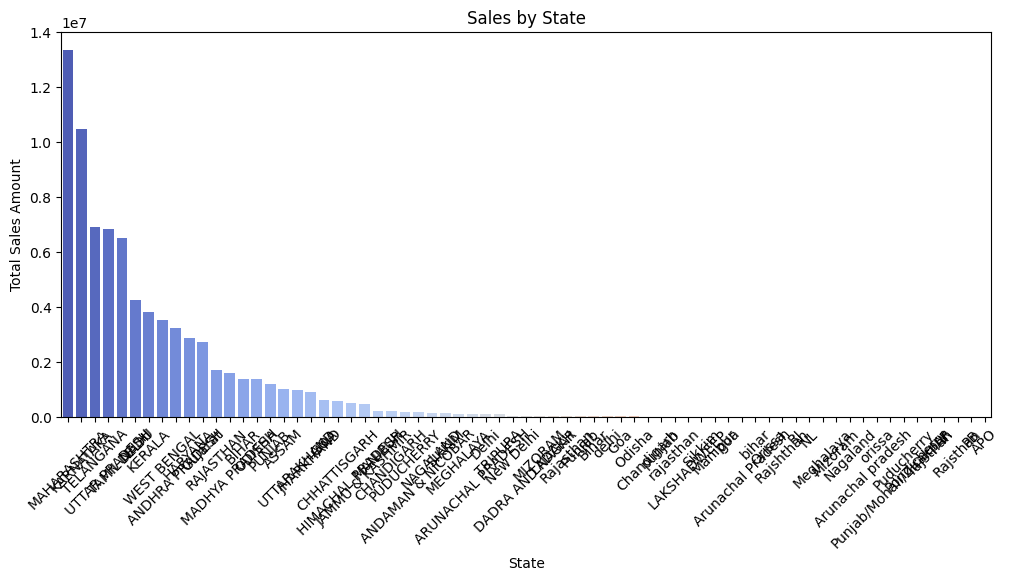

In [29]:
def geographical_analysis():
    """Analyze sales distribution across different locations."""
    if "ship-state" in df.columns:
        state_sales = df.groupby("ship-state")["Amount"].sum().sort_values(ascending=False)

        plt.figure(figsize=(12, 5))
        sns.barplot(x=state_sales.index, y=state_sales.values, palette="coolwarm")
        plt.xticks(rotation=45)
        plt.title("Sales by State")
        plt.xlabel("State")
        plt.ylabel("Total Sales Amount")
        plt.show()
    else:
        print("ship-state column not found!")

geographical_analysis()
